In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import io
from google.colab import drive


In [2]:
#Load data
drive.mount('/content/drive')
df =pd.read_csv("drive/My Drive/Capstone Project/Cervical_Cancer/kag_risk_factors_cervical_cancer.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Let's inspect the data
print(df.columns)

#Let's rename the columns so they are usable 
df.rename({
           'Age': 'age', 
           'Number of sexual partners': 'num_sex_partners',
           'First sexual intercourse': 'first_sex',
           'Num of pregnancies': 'num_preg',
           'Smokes': 'smoker',
           'Smokes (years)': 'smoke_years',
           'Smokes (packs/year)': 'pack_years',
           'Hormonal Contraceptives': 'contracept', 
           'Hormonal Contraceptives (years)': 'contracept_years',
           'IUD': 'iud',
           'IUD (years)': 'iud_years',
           'STDs': 'stds',
           'STDs (number)': 'stds_num',
           'STDs:condylomatosis': 'std_condy', 
           'STDs:cervical condylomatosis': 'std_cerv_condy',
           'STDs:vaginal condylomatosis': 'std_vag_condy',
           'STDs:vulvo-perineal condylomatosis': 'std_vulvperi_condy',
           'STDs:syphilis': 'std_syphilis',
           'STDs:pelvic inflammatory disease': 'std_pid',
           'STDs:genital herpes': 'std_herpes',
           'STDs:molluscum contagiosum': 'std_molluscum', 
           'STDs:AIDS': 'std_aids',
           'STDs:HIV': 'std_hiv',
           'STDs:Hepatitis B': 'std_hep_b',
           'STDs:HPV': 'std_hpv',
           'STDs: Number of diagnosis': 'std_num_dx',
           'STDs: Time since first diagnosis': 'std_time_first_dx',
           'STDs: Time since last diagnosis': 'std_time_last_dx',
           'Dx:Cancer': 'cancer', 
           'Dx:CIN': 'cin', 
           'Dx:HPV': 'hpv', 
           'Dx': 'dx', 
           'Hinselmann': 'hinselmann',
           'Schiller': 'schiller', 
           'Citology': 'cytology',
           'Biopsy': 'biopsy'
           }, 
          axis=1, 
          inplace=True)


Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [5]:
print(df.columns)

Index(['age', 'num_sex_partners', 'first_sex', 'num_preg', 'smoker',
       'smoke_years', 'pack_years', 'contracept', 'contracept_years', 'iud',
       'iud_years', 'stds', 'stds_num', 'std_condy', 'std_cerv_condy',
       'std_vag_condy', 'std_vulvperi_condy', 'std_syphilis', 'std_pid',
       'std_herpes', 'std_molluscum', 'std_aids', 'std_hiv', 'std_hep_b',
       'std_hpv', 'std_num_dx', 'std_time_first_dx', 'std_time_last_dx',
       'cancer', 'cin', 'hpv', 'dx', 'hinselmann', 'schiller', 'cytology',
       'biopsy'],
      dtype='object')


In [6]:
df.shape

(858, 36)

In [7]:
#Describing numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
std_num_dx,858.0,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0
cancer,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
cin,858.0,0.010490,0.101939,0.0,0.0,0.0,0.0,1.0
hpv,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
dx,858.0,0.027972,0.164989,0.0,0.0,0.0,0.0,1.0
hinselmann,858.0,0.040793,0.197925,0.0,0.0,0.0,0.0,1.0
schiller,858.0,0.086247,0.280892,0.0,0.0,0.0,0.0,1.0
cytology,858.0,0.051282,0.220701,0.0,0.0,0.0,0.0,1.0
biopsy,858.0,0.064103,0.245078,0.0,0.0,0.0,0.0,1.0


In [8]:
#Describing categorical values
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,858.0,NaN,NaN,NaN,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
num_sex_partners,858,13,2.0,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_sex,858,22,15.0,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_preg,858,12,1.0,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,858,3,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoke_years,858,31,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pack_years,858,63,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contracept,858,3,1.0,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contracept_years,858,41,0.0,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iud,858,3,0.0,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Looks like some cells have "?" which is NA
#We have to convert these to NAs
df = df.replace('?', np.nan)


In [10]:
#Looking at missing values
df.isnull().sum()

age                     0
num_sex_partners       26
first_sex               7
num_preg               56
smoker                 13
smoke_years            13
pack_years             13
contracept            108
contracept_years      108
iud                   117
iud_years             117
stds                  105
stds_num              105
std_condy             105
std_cerv_condy        105
std_vag_condy         105
std_vulvperi_condy    105
std_syphilis          105
std_pid               105
std_herpes            105
std_molluscum         105
std_aids              105
std_hiv               105
std_hep_b             105
std_hpv               105
std_num_dx              0
std_time_first_dx     787
std_time_last_dx      787
cancer                  0
cin                     0
hpv                     0
dx                      0
hinselmann              0
schiller                0
cytology                0
biopsy                  0
dtype: int64

In [11]:
#Two columns have 787 missing values, let's drop those
df.drop(['std_time_first_dx', 'std_time_last_dx'], axis=1, inplace = True)

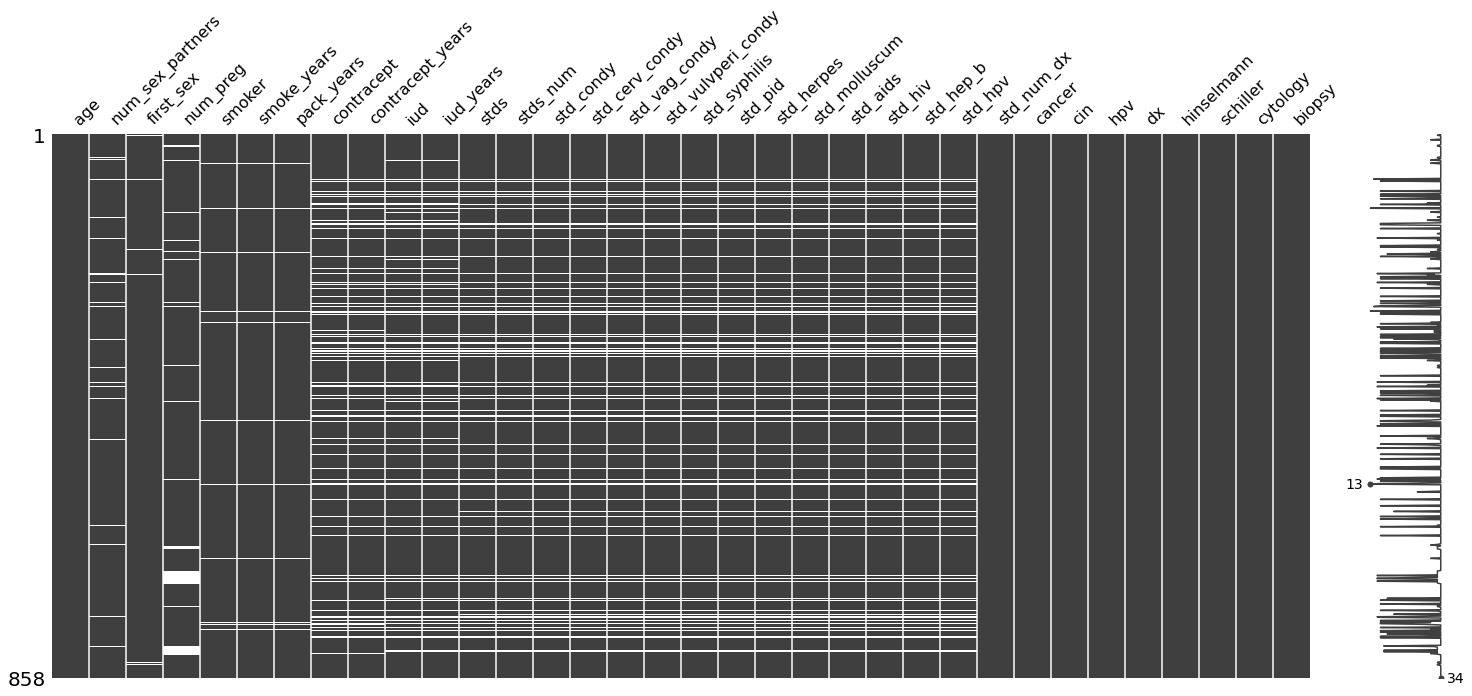

In [12]:
#Impute missing values with median 
import missingno as msno
msno.matrix(df)


In [13]:
df = df.fillna(df.median())
df.isnull().sum()

age                   0
num_sex_partners      0
first_sex             0
num_preg              0
smoker                0
smoke_years           0
pack_years            0
contracept            0
contracept_years      0
iud                   0
iud_years             0
stds                  0
stds_num              0
std_condy             0
std_cerv_condy        0
std_vag_condy         0
std_vulvperi_condy    0
std_syphilis          0
std_pid               0
std_herpes            0
std_molluscum         0
std_aids              0
std_hiv               0
std_hep_b             0
std_hpv               0
std_num_dx            0
cancer                0
cin                   0
hpv                   0
dx                    0
hinselmann            0
schiller              0
cytology              0
biopsy                0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


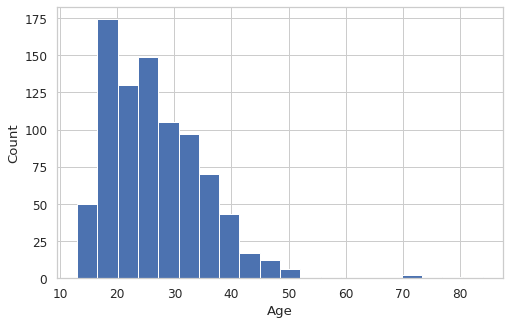

In [14]:
#Create some visualizations
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['age'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age', ylabel='Count');

In [15]:
print("The minimum age is:", df['age'].min())
print("Old df shape", df.shape)
#The minimum age is 13, we should get rid of anyone who is below 21

df = df.loc[df['age'] >= 21]
print("New df shape", df.shape)

The minimum age is: 13
Old df shape (858, 34)
New df shape (634, 34)


In [16]:
df.value_counts('cancer')
#We have 617 non cancer and 17 cancer 

cancer
0    617
1     17
dtype: int64

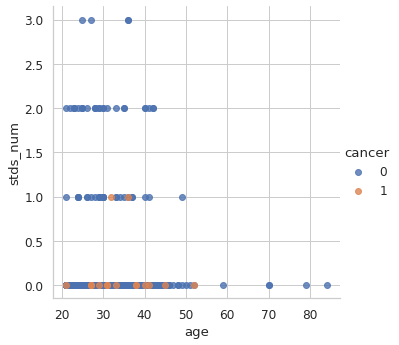

In [17]:
#Some more visualizations
df['stds_num'] = df['stds_num'].astype(np.float16)

sns.lmplot(x = 'age', y = 'stds_num', data = df, fit_reg=False, hue = 'cancer')


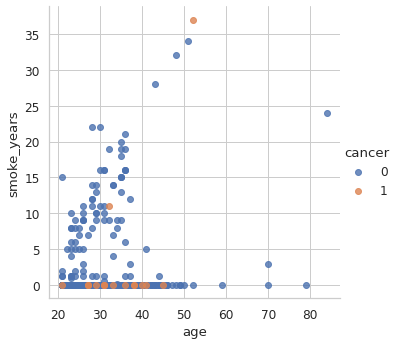

In [18]:
df['smoke_years'] = df['smoke_years'].astype(np.float16)
sns.lmplot(x = 'age', y = 'smoke_years', data = df, fit_reg=False, hue = 'cancer')


In [19]:
df.columns

Index(['age', 'num_sex_partners', 'first_sex', 'num_preg', 'smoker',
       'smoke_years', 'pack_years', 'contracept', 'contracept_years', 'iud',
       'iud_years', 'stds', 'stds_num', 'std_condy', 'std_cerv_condy',
       'std_vag_condy', 'std_vulvperi_condy', 'std_syphilis', 'std_pid',
       'std_herpes', 'std_molluscum', 'std_aids', 'std_hiv', 'std_hep_b',
       'std_hpv', 'std_num_dx', 'cancer', 'cin', 'hpv', 'dx', 'hinselmann',
       'schiller', 'cytology', 'biopsy'],
      dtype='object')

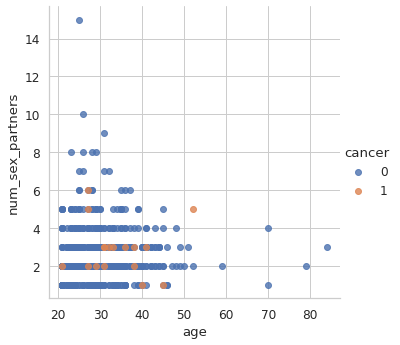

In [20]:
df['num_sex_partners'] = df['num_sex_partners'].astype(np.float16)
sns.lmplot(x = 'age', y = 'num_sex_partners', data = df, fit_reg=False, hue = 'cancer')


In [21]:
#df['first_sex'] = df['first_sex'].astype(np.float16)
#df['num_preg'] = df['num_preg'].astype(np.float16)
#df['contracept'] = df['contracept'].astype(np.float16)
#df['contracept_years'] = df['contracept_years'].astype(np.float16)
#df['smoke_years'] = df['smoke_years'].astype(np.float16)
#df['iud'] = df['iud'].astype(np.float16)
#df['iud_years'] = df['iud_years'].astype(np.float16)
df = df.astype(np.float16)

In [22]:
#Let's build a baseline decision tree model

#Get labels
labels = np.array(df['cancer'])

#Drop cancer variable (and HPV variable)
df.drop('cancer', axis = 1, inplace = True)
df.drop('hpv', axis = 1, inplace = True)
df_list = list(df.columns)

#Create dummies/one hot encoding
df_dum = pd.get_dummies(df)
df_list_dum = list(df_dum.columns)

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df, train_labels, test_labels = train_test_split(df_dum, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_df.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_df.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (475, 32)
Training Labels Shape: (475,)
Testing Features Shape: (159, 32)
Testing Labels Shape: (159,)


In [28]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_df, train_labels)

y_pred=rf.predict(test_df)


In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9937106918238994


In [40]:
feature_imp = pd.Series(rf.feature_importances_,index=df_dum.columns).sort_values(ascending=False)
feature_imp

dx                    0.292668
contracept_years      0.089769
age                   0.084023
first_sex             0.080521
std_hpv               0.067950
num_sex_partners      0.051253
num_preg              0.045939
pack_years            0.035539
iud_years             0.034110
cytology              0.033238
smoke_years           0.031826
biopsy                0.025066
cin                   0.024859
schiller              0.024614
iud                   0.016733
contracept            0.016571
hinselmann            0.014087
stds_num              0.007758
stds                  0.007538
std_num_dx            0.005641
smoker                0.004418
std_condy             0.002137
std_vulvperi_condy    0.001887
std_syphilis          0.000912
std_hiv               0.000826
std_vag_condy         0.000113
std_pid               0.000002
std_hep_b             0.000000
std_aids              0.000000
std_molluscum         0.000000
std_herpes            0.000000
std_cerv_condy        0.000000
dtype: f

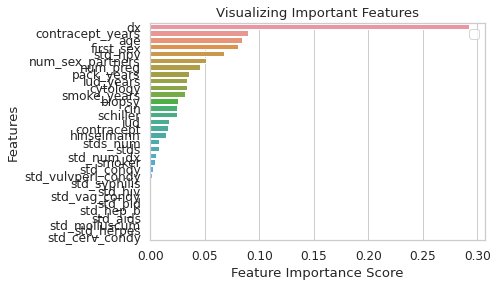

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#Generating on a model on selected features (sample code, need to change)
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test